# 0. Install Dependencies and Bring in Data

## Installing packages

In [1]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

## Importing packages

In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

## Importing dataset and performing some EDA to understand it

#### The Project that I have decided to choose is from this link. 

- https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/data

Discussing things you care about can be difficult. The threat of abuse and harassment online means that many people stop expressing themselves and give up on seeking different opinions. Platforms struggle to effectively facilitate conversations, leading many communities to limit or completely shut down user comments.

The Conversation AI team, a research initiative founded by Jigsaw and Google (both a part of Alphabet) are working on tools to help improve online conversation. One area of focus is the study of negative online behaviors, like toxic comments (i.e. comments that are rude, disrespectful or otherwise likely to make someone leave a discussion). 

I am trying to solve this problem with this project. 

Today, Jigsaw is a unit within Google that explores threat to open societies. 

- https://jigsaw.google.com/

In [3]:
# Importing dataset

df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))

In [4]:
# Checking dataset
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
# since df.head has all the positive comments. I will use df.sample(10) to see the comments in random. 

df.sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
32379,561cacaea252342c,my objections \n\nInformations not accurate ar...,0,0,0,0,0,0
119678,7fe13f3ea7605f02,No need for dispute resolution. Simply start ...,0,0,0,0,0,0
25115,42782a24475aa76e,"|listas = Murray, Donald Walter Gordon",0,0,0,0,0,0
79059,d3979b58efaf9711,I'll also add that if you do not like the trut...,0,0,0,0,0,0
121062,87aea74d1caaee06,Fuck you you bitch ass ho.,1,1,1,0,1,0
63120,a8e142b9cac746ef,Thank that is very helpful. Thanks a lot. 66....,0,0,0,0,0,0
100663,1abeb387fade119b,"""\n\n I am happy to answer this honestly and f...",0,0,0,0,0,0
75936,cb31be6d77bcf383,"""\n\nName\n""""Hyacinth,"""" customarily an Englis...",0,0,0,0,0,0
145115,17777f5fa4082e44,hahah how is where he services his car relevant??,0,0,0,0,0,0
36190,60b251d7818d8462,their spoken language is Syriac and,0,0,0,0,0,0


In [6]:
df.shape # 159571 comments are there. It has 6 classifications already in one hot encoded form.  

(159571, 8)

In [7]:
df.info()   # no missing values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


### Checking some comments

In [8]:
df.iloc[3]['comment_text']

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [9]:
df.iloc[39611]['comment_text']

'Shut up asshole \n\nShut up you asshole I fucking hate you, Kids CBC IS stupid so why keep reverting my edits?'

In [10]:
df.iloc[35314]['comment_text']

'"\n\nWhat an idiotic load of blather! You might as well ask if it\'s \'justified\' or \'valid\' to use the concept of \'volcanoes\' in discussing the destruction of Pompeii \'because ancient Romans had no concept of ""vulcanology""\'. Pathetic!    "'

### Checking only toxic comments

In [11]:
df[df['toxic']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


### Checking only severe_toxic comments

In [12]:
df[df['severe_toxic']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
181,006e87872c8b370c,you are a stupid fuck \n\nand your mother's cu...,1,1,1,0,1,0
442,01208d2b76624130,Hi \n\nIm a fucking bitch.\n\n50.180.208.181,1,1,1,0,1,0
579,018663f910e0bfe6,What a motherfucking piece of crap those fuckh...,1,1,1,0,1,0


### Checking only obscene comments

In [13]:
df[df['obscene']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0


### Checking only threat comments

In [14]:
df[df['threat']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
79,003217c3eb469ba9,Hi! I am back again!\nLast warning!\nStop undo...,1,0,0,1,0,0
176,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1
600,0199d6af27b715f3,I'm also a sock puppet of this account...SUPRI...,1,0,0,1,0,0
802,02230885017a50c5,"Fuck you, Smith. Please have me notified when ...",1,0,1,1,1,0
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1


### Checking only insult comments

In [15]:
df[df['insult']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
56,0020fd96ed3b8c8b,=Tony Sidaway is obviously a fistfuckee. He lo...,1,0,1,0,1,0


### Checking only identity_hate comments

In [16]:
df[df['identity_hate']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
105,00472b8e2d38d1ea,A pair of jew-hating weiner nazi schmucks.,1,0,1,0,1,1
176,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1
218,008e0818dde894fb,"Kill all niggers. \n\nI have hard, that others...",1,0,1,0,1,1
238,0097dd5c29bf7a15,u r a tw@ fuck off u gay boy.U r smelly.Fuck u...,1,0,1,0,1,1


In [17]:
# Checking correlation
df.corr()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


Everything seems to be normally correlated. 

## Lets go through the value counts and bar chart to get a clearer picture of data

toxic
0    144277
1     15294
Name: toxic, dtype: int64


C:\Users\shame\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


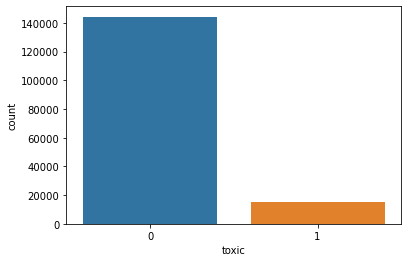

severe_toxic
0    157976
1      1595
Name: severe_toxic, dtype: int64


C:\Users\shame\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


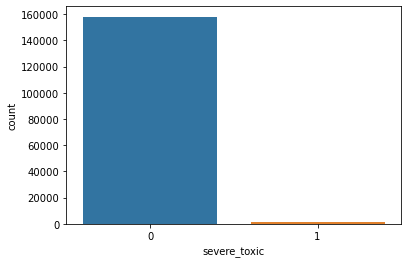

obscene
0    151122
1      8449
Name: obscene, dtype: int64


C:\Users\shame\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


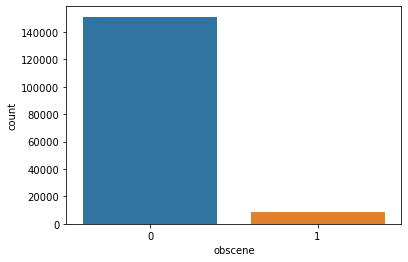

threat
0    159093
1       478
Name: threat, dtype: int64


C:\Users\shame\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


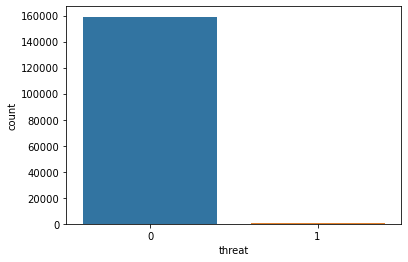

insult
0    151694
1      7877
Name: insult, dtype: int64


C:\Users\shame\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


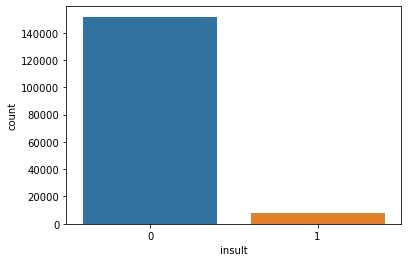

identity_hate
0    158166
1      1405
Name: identity_hate, dtype: int64


C:\Users\shame\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


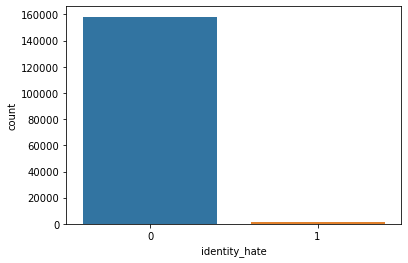

In [26]:
import seaborn as sns

cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for i in cols:
    print(i)
    print(df[i].value_counts())
    sns.countplot(df[i])
    plt.show()

### Installing WordCloud package to visualize the words that were more often used in the specific category

In [20]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


## Toxic Wordcloud

#### List of some words that often appear in toxic comments
### Sorry about the level of toxicity in it!

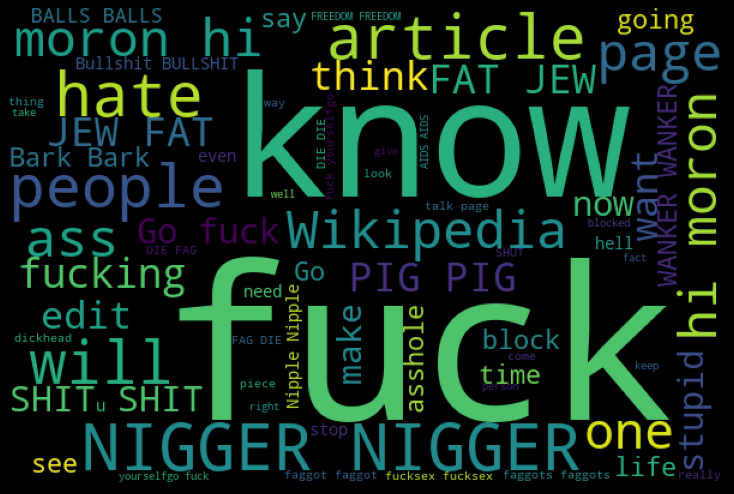

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

WC = df['comment_text'][df['toxic']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=70).generate(''. join(WC))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Severe Toxic Wordcloud

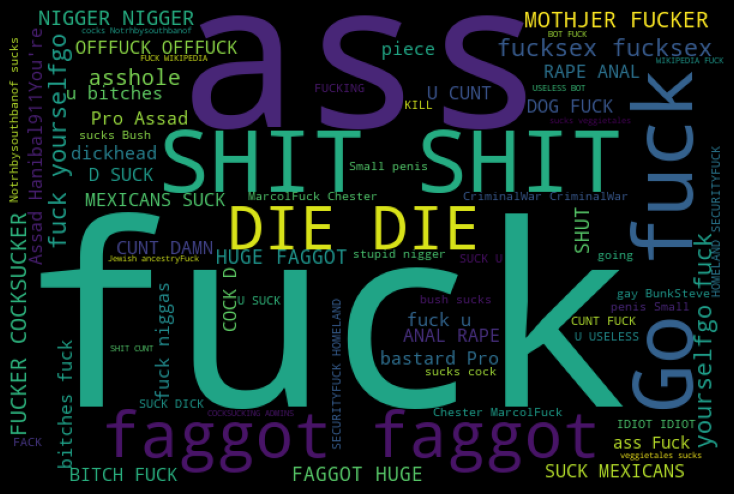

In [30]:
WC = df['comment_text'][df['severe_toxic']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=70).generate(''. join(WC))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Obscene Wordcloud

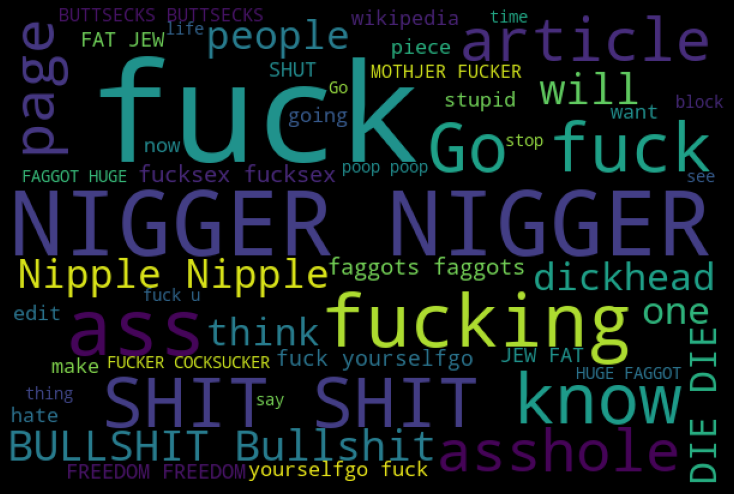

In [31]:
WC = df['comment_text'][df['obscene']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=50).generate(''. join(WC))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Threat Wordcloud

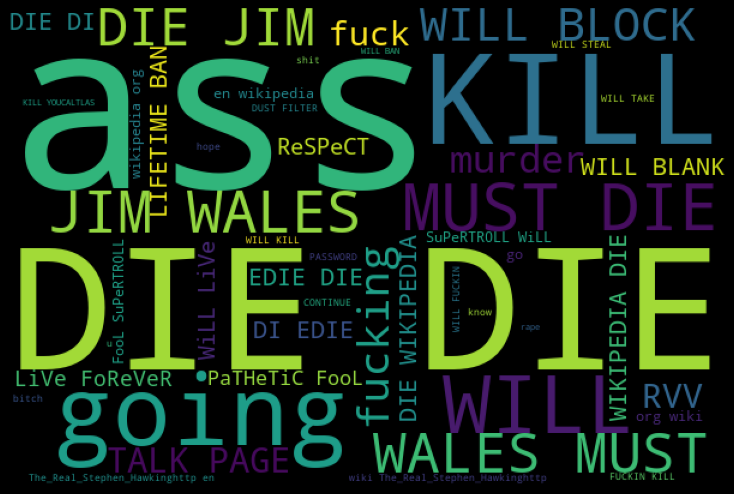

In [32]:
WC = df['comment_text'][df['threat']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=50).generate(''. join(WC))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Insult Wordcloud

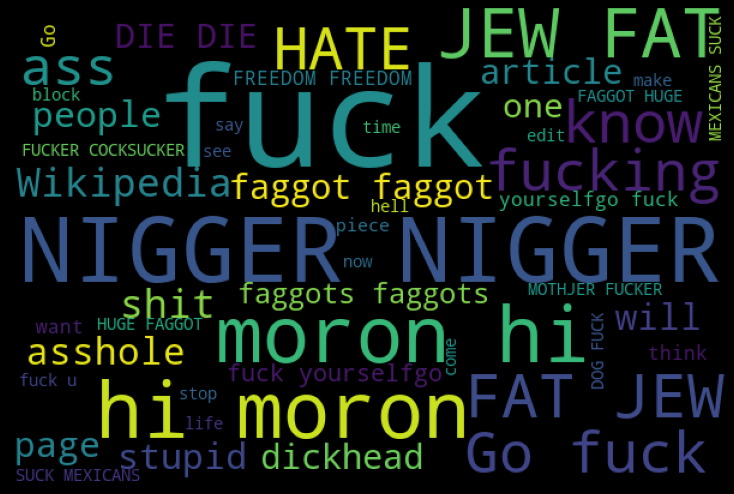

In [33]:
WC = df['comment_text'][df['insult']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=50).generate(''. join(WC))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Identity_hate Wordcloud

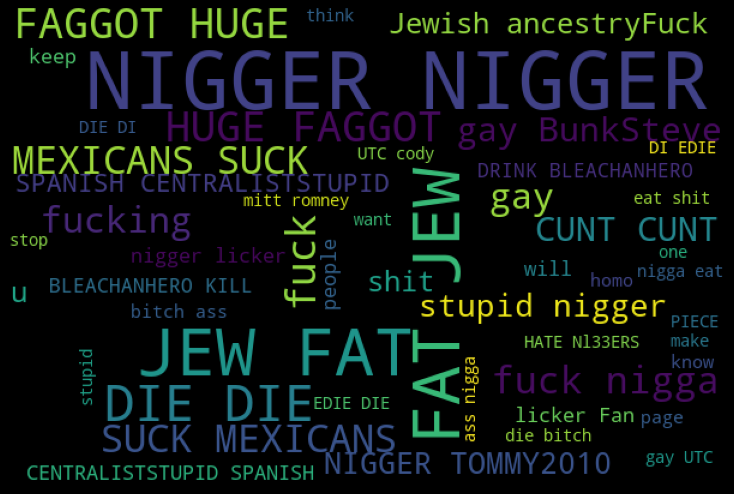

In [34]:
WC = df['comment_text'][df['identity_hate']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=50).generate(''. join(WC))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

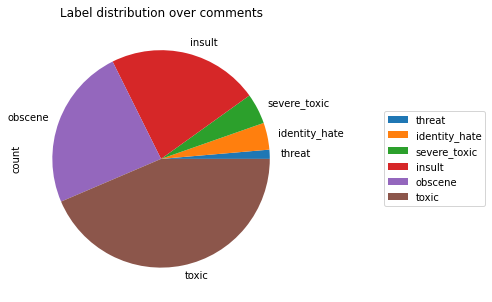

In [36]:
df_distribution = df[cols].sum()\
                    .to_frame()\
                    .rename(columns={0: 'count'})\
                    .sort_values('count')
df_distribution.plot.pie(y = 'count', 
                         title = 'Label distribution over comments', 
                         figsize=(5,5))\
.legend(loc = 'center left', bbox_to_anchor = (1.3, 0.5))

# 1. Preprocess

## TextVectorization =  A preprocessing layer which maps text features to integer sequences.

Includes 7 Methods:- 

- adapt
- compile
- get_vocabulary
- reset_state
- set_vocabulary
- update_state
- vocabulary_size


I will be using this for managing text in a Keras model. It transforms a batch of strings (one example = one string) into either a list of token indices (one example = 1D tensor of integer token indices) or a dense representation (one example = 1D tensor of float values representing data about the example's tokens). This layer is meant to handle natural language inputs. 

In [37]:
from tensorflow.keras.layers import TextVectorization

In [38]:
# Splitting dataset for vectorization to convert text into numbers

X = df['comment_text']
y = df[df.columns[2:]].values

In [39]:
MAX_FEATURES = 200000 # number of words in the vocab

- Imported TextVectorization Done. 
- Split Dataset Done. 
    - X variable has only comment column
    - y variable has toxic, severe_toxic, obscene, threat, insult, identity_hate

## It involves:- 

- **max_tokens** = Maximum size of the vocabulary for this layer. 
- **output_sequence_length** = Only valid in INT mode. If set, the output will have its time dimension padded or truncated to exactly output_sequence_length values, resulting in a tensor of shape (batch_size, output_sequence_length) regardless of how many tokens resulted from the splitting step.
- **standardize** = removing all punctuations and lowering casing all the words to get only words as a result. Helps in machine training better. 
- **output_mode** = integer form result. 

In [40]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               standardize='lower_and_strip_punctuation',
                               output_mode='int')

The vocabulary for the layer must be either supplied on construction or learned via adapt(). When this layer is adapted, it will analyze the dataset, determine the frequency of individual string values, and create a vocabulary from them. This vocabulary can have unlimited size or be capped, depending on the configuration options for this layer; if there are more unique values in the input than the maximum vocabulary size, the most frequent terms will be used to create the vocabulary.

During adapt(), the layer will build a vocabulary of all string tokens seen in the dataset, sorted by occurrence count, with ties broken by sort order of the tokens (high to low).

In [41]:
vectorizer.adapt(X.values)

In [53]:
vectorizer('Life is Awesome !')[:5] 

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([ 305,    9, 3258,    0,    0], dtype=int64)>

The vectorizer is now converting the text into numbers which can be fed into the model.

- life = 305
- is = 9
- Awesome = 3258
- ! = is not added since we used standardize = 'lower_and_strip_punctuation' while vectorizing it. 

#### Saving the vectorized values into vectorized_text variable

In [57]:
vectorized_text = vectorizer(X.values)
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  643,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2506, ...,     0,     0,     0],
       [  425,   440,    70, ...,     0,     0,     0],
       ...,
       [32141,  7329,   383, ...,     0,     0,     0],
       [    5,    12,   533, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

#### This is the numerical representation of all of our sentences. The shape is 159571 which is all the comments and 1800 is the capped limit that we used for a sentence. It will fill the remaining words as a Zero if it is less than 1800 words. 

 The tf.data API enables you to build complex input pipelines from simple, reusable pieces. *For example, the pipeline for an image model might aggregate data from files in a distributed file system, apply random perturbations to each image, and merge randomly selected images into a batch for training.* The pipeline for a text model might involve extracting symbols from raw text data, converting them to embedding identifiers with a lookup table, and batching together sequences of different lengths. **The tf.data API makes it possible to handle large amounts of data, read from different data formats, and perform complex transformations.**

 The tf.data API introduces a tf.data.Dataset abstraction that represents a sequence of elements, in which each element consists of one or more components. For example, in an image pipeline, an element might be a single training example, with a pair of tensor components representing the image and its label.
 
- https://www.tensorflow.org/guide/data
- https://www.tensorflow.org/api_docs/python/tf/data/Dataset


#### We will use - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file

In [55]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [ ]:
# batch_X, batch_y = dataset.as_numpy_iterator().next()
# batch_X.shape = (16,1800)
# batch_y.shape = (16,6)

- **cache** = Caches the elements in this dataset. The first time the dataset is iterated over, its elements will be cached either in the specified file or in memory. Subsequent iterations will use the cached data.
- **shuffle** = Randomly shuffles the elements of this dataset. 
- **batch** = Combines consecutive elements of this dataset into batches.
- **prefetch** = Creates a Dataset that prefetches elements from this dataset. Most dataset input pipelines should end with a call to prefetch. This allows later elements to be prepared while the current element is being processed. This often improves latency and throughput, at the cost of using additional memory to store prefetched elements.

### Splitting dataset to feed into the algorithm

Train = 70%
Validation = 20%
Test = 10%



In [56]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

# 2. Create Sequential Model

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [59]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [60]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [62]:
history = model.fit(train, epochs=7, validation_data=val) # my laptop takes 1.15hrs for one epoch. So, could go till 8 hrs for 7 epochs.

Epoch 1/7
6981/6981 [==============================] - 4251s 608ms/step - loss: 0.0625 - val_loss: 0.0444
Epoch 2/7
6981/6981 [==============================] - 4285s 614ms/step - loss: 0.0458 - val_loss: 0.0412
Epoch 3/7
6981/6981 [==============================] - 4637s 664ms/step - loss: 0.0414 - val_loss: 0.0351
Epoch 4/7
6981/6981 [==============================] - 4491s 643ms/step - loss: 0.0369 - val_loss: 0.0343
Epoch 5/7
6981/6981 [==============================] - 4280s 613ms/step - loss: 0.0328 - val_loss: 0.0293
Epoch 6/7
6981/6981 [==============================] - 4383s 628ms/step - loss: 0.0293 - val_loss: 0.0265
Epoch 7/7
6981/6981 [==============================] - 4129s 591ms/step - loss: 0.0266 - val_loss: 0.0239


In [63]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

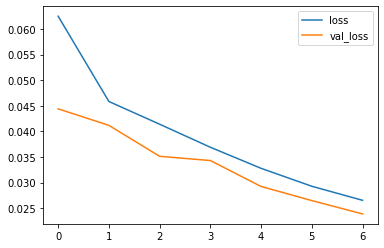

In [64]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3. Make Predictions

In [117]:
# Attempting to predict. Using vectorizer to convert texts to feed the model.
input_text = vectorizer('you should be thrown out of the team, you dont know a thing about soccer.')

In [118]:
# Checking the vectorized text transformed into int.
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([ 7, 59, 17, ...,  0,  0,  0], dtype=int64)>

In [119]:
# Labels
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [120]:
# Predicting the output
model.predict(np.array([input_text]))

1/1 [==============================] - 0s 64ms/step


array([[0.49931836, 0.49984378, 0.50209326, 0.50201666, 0.50029564,
        0.50043064]], dtype=float32)

In [121]:
res = model.predict(np.expand_dims(input_text,0)) #expand_dims makes it look cleaner and adds a dimension which the model is expecting

1/1 [==============================] - 0s 62ms/step


In [122]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [123]:
(res > 0.5).astype(int)

array([[0, 0, 1, 1, 1, 1]])

In [124]:
res.shape

(1, 6)

# 4. Evaluate Model

In [73]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

**Precision**
- Precision is calculated by dividing the true positives by anything that was predicted as a positive. 
- TP/(TP+FP)

**Recall**
- Recall (or True Positive Rate) is calculated by dividing the true positives by anything that should have been predicted as positive. TP/(TP+FN)

**Keras offers the following Accuracy metrics**
- Accuracy
- Binary Accuracy
- **Categorical Accuracy**
- TopK Categorical Accuracy
- Sparse TopK Categorical Accuracy

*Categorical Accuracy* calculates the percentage of predicted values (yPred) that match with actual values (yTrue) for **one-hot labels.**

For a record:

- We identify the index at which the maximum value occurs using argmax().
- If it is the same for both yPred and yTrue, it is considered accurate.

We then calculate Categorical Accuracy by dividing the number of accurately predicted records by the total number of records.

As Categorical Accuracy looks for the index of the maximum value, yPred can be logit or probability of predictions

In [74]:
# instantiation of all the metrics
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [75]:
# creating a loop to loop through test set in batches
for batch in test.as_numpy_iterator(): 
    # Unpacking the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 111ms/step


1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 119ms/step


In [76]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8842394351959229, Recall:0.8823529481887817, Accuracy:0.5015045404434204


- What is the **Precision** for our model? It is **0.884** or, when it predicts that a sentence contains toxic words, it is correct around 88% of the time. Precision = TruePositives / (TruePositives + FalsePositives)

- The **Recall** is the measure of our model correctly identifying True Positives. Thus, for all the comments that are toxic in nature, recall tells us how many we correctly identified as having a toxic comment. It is **0.882**.  Recall = TruePositives / (TruePositives + FalseNegatives)


- **Categorical Accuracy** calculates the percentage of predicted values (yPred) that match with actual values (yTrue) for **one-hot labels.** Which turns out to be **50%.** While performing EDA on the dataset, we saw that the distribution of toxic comments are very less. Because of this imbalance, accuracy is not that important metric for evaluating classifiers for this problem. **Instead, I propose using an F1 Score, which severely penalizes models that just predict everything as either positive or negative with an imbalanced dataset.


Using accuracy as a defining metric for our model does make sense intuitively, but more often than not, it is always advisable to use Precision and Recall too. There might be other situations where our accuracy is very high, but our precision or recall is low. Ideally, for our model, we would like to completely avoid any situations where the comments are toxic in nature, but our model classifies as comment not having it. i.e., aim for high recall.


**F-Measure** turns out to be around **0.88**. 
- F-Measure = (2 * Precision * Recall) / (Precision + Recall)

The F1 score is a harmonic average between precision and recall. This combines the strengths of precision and recall while balancing out their weaknesses, creating a score that can fairly evaluate models regardless of dataset imbalance.

Because it’s performance is similar to the results obtained in the precision and recall scores, I can confidently say that the model will generalize well to unseen data. Because it is a real world dataset with a huge variety of comments discussing a diverse range of topics and covering situations from informative posts to flame wars, this is probably a *good* model in my view. 

## Improvements

- I believe that there are always more ways to improve a solution. 
- One way that I could think of is using multiple models, where the problem is divided into various smaller problems and then conquering each one of them. By training models on different situations, like a model that's only been trained on comments by a user who has already been flagged as toxic in the past, or short comments. 
- Another way could be using pre trained models by Google or Meta and then using transfer learning to make it specific to my problem that I am trying to solve. 

In [ ]:
# confusion_matrix(y_true , yhat)
# pd.crosstab(y_true, yhat, rownames = ['Actual'], colnames =['Predicted'], margins = True)

# 5. Test and Gradio

I am not acquainted with deploying a model. I wanted an easy deployment engine to check my model working in real time. I am using **Gradio by HuggingFace.** 

In [77]:
!pip install gradio jinja2

In [78]:
import tensorflow as tf
import gradio as gr

##### Saving model

In [79]:
model.save('toxicity_final.h5')

##### Loading saved model for prediction

In [80]:
model = tf.keras.models.load_model('toxicity_final.h5')

##### Checking whether model is working properly without any errors.

In [81]:
input_str = vectorizer('hey i freaken hate you!')

In [82]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 615ms/step


In [83]:
res

array([[0.89709574, 0.00974917, 0.04052655, 0.02307895, 0.3218383 ,
        0.200901  ]], dtype=float32)

##### Defining a function to let the gradio interface know what it should do.

In [84]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

##### Simple inferface with two text boxes.

In [85]:
# Simple inferface with two text boxes.
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

C:\Users\shame\anaconda3\lib\site-packages\gradio\inputs.py:26: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\shame\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\shame\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\shame\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


#### It can be shared publicly for 72 hours. It creates a log file in the current directory to keep a log of all the comments one typed in and the time it took to predict along with the predicted output of labels.

In [86]:
 interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://3785e6edeec2c6ff.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x225b39a0af0>,
 'http://127.0.0.1:7860/',
 'https://3785e6edeec2c6ff.gradio.app')

1/1 [==============================] - 0s 63ms/step
